In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_for_specificity_prediction.csv')

In [3]:
data

,goal,id,result_tokens,goal_type_tokens,first_step_tokens,time_tokens,goal_field_tokens,obstacle_tokens,sex_tokens,education_tokens,...,job_tokens,sp_0,sp_1,sp_2,at_0,at_1,at_2,tb_0,tb_1,tb_2
0,Развитие профессиональных навыков,0,"&РЕЗУЛЬТАТ_Да,_четко",НЕТ ИНФОРМАЦИИ,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,...,НЕТ ИНФОРМАЦИИ,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Хочу стать выпускником президентской программы,1,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы,"&ОБЛАСТЬ_ЦЕЛИ_Иностранные_языки,_гуманитарные_...",&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,&СФЕРА_ЗАНЯТОСТИ_Органы_управления,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,приобретение новых знаний,2,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков,&ОБЛАСТЬ_ЦЕЛИ_другое,&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,&СФЕРА_ЗАНЯТОСТИ_Органы_управления,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,мне хочется узнать о мире как можно больше за ...,4,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков,&ОБЛАСТЬ_ЦЕЛИ_другое,&ПРЕГРАДЫ_Не_вижу_преград,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,...,НЕТ ИНФОРМАЦИИ,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Получение новых знаний,5,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",&ВРЕМЕННЫЕ_ГРАНИЦЫ_Не_знаю,"&ОБЛАСТЬ_ЦЕЛИ_Универсальные_компетенции,_гибки...",&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,&СФЕРА_ЗАНЯТОСТИ_Образование,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,Постоянный личностный рост,5995,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы,"&ОБЛАСТЬ_ЦЕЛИ_Личные_финансы,_работа,_бизнес_и...",&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Мужчина,"&ОБРАЗОВАНИЕ_Ученая_степень_(кандидат_наук,_до...",...,&СФЕРА_ЗАНЯТОСТИ_Энергетическая_промышленность,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5149,накопление компетенций,5996,"&РЕЗУЛЬТАТ_Да,_нечетко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков,&ОБЛАСТЬ_ЦЕЛИ_Естественные_науки &ПОДОБЛАСТЬ_Ц...,&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Мужчина,&ОБРАЗОВАНИЕ_Высшее_образование,...,&СФЕРА_ЗАНЯТОСТИ_Образование,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5150,Разобраться в современных технологиях в образо...,5997,"&РЕЗУЛЬТАТ_Да,_нечетко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",&ВРЕМЕННЫЕ_ГРАНИЦЫ_Не_знаю,&ОБЛАСТЬ_ЦЕЛИ_Математика_и_IT &ПОДОБЛАСТЬ_ЦЕЛИ...,&ПРЕГРАДЫ_есть_преграды,&ПОЛ_Женщина,"&ОБРАЗОВАНИЕ_Ученая_степень_(кандидат_наук,_до...",...,&СФЕРА_ЗАНЯТОСТИ_Образование,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5151,Впоследствии повысить качество образования сво...,5998,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",НЕТ ИНФОРМАЦИИ,&ОБЛАСТЬ_ЦЕЛИ_другое,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,...,НЕТ ИНФОРМАЦИИ,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


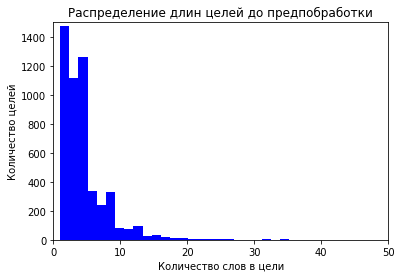

In [4]:
lenghts = data['goal'].apply(lambda s: len(s.split(' ')))
fig, ax = plt.subplots()
plt.hist(lenghts, bins=160, color = 'blue', label='empirical histogram')
ax.set_xlim(left=0, right=50)
ax.set_ylim(bottom=0, top=1500)
ax.set_title('Распределение длин целей до предпобработки')
ax.set_xlabel('Количество слов в цели')
ax.set_ylabel('Количество целей')
plt.show()

fig.savefig('./images/Распределение длин целей ДО.pdf')

Подавляющее число документов состоит менее чем из 10 слов.

In [5]:
length_distribution = pd.DataFrame(lenghts.describe()).rename(columns={'goal': 'до предобработки'})

In [6]:
length_distribution

,до предобработки
count,5153.000000
mean,4.692800
std,5.675536
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,220.000000


In [7]:
for row in data['goal']:
    print(row)

Развитие профессиональных навыков
Хочу стать выпускником президентской программы
приобретение новых знаний
мне хочется узнать о мире как можно больше за то короткое время, которое отведено человеку
Получение новых знаний
Повышение зарплаты
получение новых знаний
повысить свои знания
Достичь того уровня образования, которое будет меня устраивать
Повышение эрудиции и увеличение кругозора
Повышение компетентности
расширение возможностей для карьерного роста
Усиление имеющихся знаний и навыков
обновление устаревшей информации
Повышение результативности труда
Развитие профессиональных качеств и навыков
Получить новые знания
развитие профессиональных навыков
узнать что -то новое
самоопределение
Научиться понимать людей
повышение кмпетентности
Достижение желаемых целей
Получить образование
получить новые знания
Совершенствование знаний
Повышение знаний
Новые знания
повысить уровень знаний возможности компьютера
Углубление профессиональных знаний
Читать книжки
Развитие карьеры
Стать проф фотог

Иметь больше знаний в интересующих меня областях
научиться понимать людей
изучать что-то новое
Получить диплом, стать хорошим и востребовангым врачем
Знания
Обучение
Знать больше и понимать мир лучше
Быть в курсе нового
В 2021 получить звание доцента
Расширение и углубление теоретических знаний
Защитить докторскую диссертацию
Получение знаний, которые мне необходимы 
Правовая грамотность.
Выучить Английский
Правовая грамотность.
Освоение цифровой грамотности на уровни базового проектирования и разработки цифровых сервисом
Познать новое
самообразование
развитие эмпатии
Роо
Понимание того, как устроен мир и как устроен человек
Выучить английский язык
Формирование собственного взгляда на различные сферы жизни
Получить диплом
расширение знаний в области маркетинга образовательных услуг
Знания и их дальнейшее применение
закончить учебу
мобильность
Выучить язык программирования на уровне, достаточном для применения в рабочих задачах
Получить знания в Универе
повышение уровня знаний и навыков

Научиться программированию
Закончить вуз
Хочется новых познаний
быть в ногу со временем
Почерпнуть новые знания
Стимул 
Тренировака мозга
полное изучение понравившейся мне темы
Развитие осознанности
Разговаривать в совершенстве на английском языке
За год научиться справляться с приливами плохого настроения
выучить что то новое
Научится правильно реагировать на злость
Выучить английский язык
Осмыслено прочитывать не менее 100 страниц текста  в час
Java
Получить диплом
Приобретение новой специализации в основной проф.деятельности
профессиональный рост
возможность свободного творчества в своей деятельности
Освоить методики работы различных школ мышления
Выучить иностранный
Совершенствование знаний
Саморазвитие
получить образование
повышение профессионального уровня
Получить образование
становление востребованным специалистом в своей области
Стать специалистом в определённой области
Развить свои профессиональные качества
Изучения языка программирования Java
Профессионализм 
Получить знания

# Предобработка данных

In [8]:
import string
import re
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

import tqdm
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import mwparserfromhell
from nltk.stem import WordNetLemmatizer
from nltk.collocations import (
    BigramAssocMeasures,
    BigramCollocationFinder,
)
from nltk.corpus import (
    stopwords,
    wordnet,
)

[nltk_data] Downloading package wordnet to /home/polina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/polina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
columns = ['goal', 'result_tokens', 'goal_type_tokens', 'first_step_tokens',
       'time_tokens', 'goal_field_tokens', 'obstacle_tokens', 'sex_tokens',
       'education_tokens', 'activity_tokens', 'job_tokens', 'sp_0', 'sp_1',
       'sp_2', 'at_0', 'at_1', 'at_2', 'tb_0', 'tb_1', 'tb_2']

In [10]:
data.drop_duplicates(subset=columns, keep=False, inplace=True)

In [11]:
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return ''

In [12]:
tokenized_text = []

for text in data['goal'].values:
    tokens = nltk.wordpunct_tokenize(text.lower())
    tokenized_text.append(nltk.pos_tag(tokens))

data['tokenized'] = tokenized_text

In [13]:
lemmatized_text = []
wnl = WordNetLemmatizer()

for text in data['tokenized'].values:
    lemmatized = [wnl.lemmatize(word,nltk2wn_tag(pos))
                  if nltk2wn_tag(pos) != ''
                  else wnl.lemmatize(word)
                  for word, pos in text ]
    lemmatized = [morph.parse(word)[0].normal_form for word in lemmatized]
    lemmatized = [word for word in lemmatized 
                  if word not in russian_stopwords and word.isalpha()]
    lemmatized_text.append(lemmatized)

data['lemmatized'] = lemmatized_text

In [14]:
i = 0
for index, goal in data.iterrows():
    if 'hard' in goal['lemmatized']:
        i += 1
        print(index)
print(i)

2412
3684
5064
3


In [15]:
data['lemmatized'].head(1150)

0                     [развитие, профессиональный, навык]
1       [хотеть, стать, выпускник, президентский, прог...
2                           [приобретение, новый, знание]
3       [хотеться, узнать, мир, большой, короткий, вре...
4                              [получение, новый, знание]
                              ...                        
1206                              [рост, профессионализм]
1207                                   [научиться, новый]
1208           [повышение, свой, профессиональный, навык]
1209                                       [саморазвитие]
1210                         [стать, хороший, специалист]
Name: lemmatized, Length: 1150, dtype: object

In [16]:
bigram_measures = BigramAssocMeasures()
lemmatized_goals = data['lemmatized']
finder = BigramCollocationFinder.from_documents(lemmatized_goals)

finder.apply_freq_filter(2)
set_dict = set(finder.nbest(bigram_measures.pmi,32100)[100:])
documents = lemmatized_goals
bigrams = []

for doc in documents:
    entry = ['_'.join([word_first, word_second])
             for word_first, word_second in zip(doc[:-1],doc[1:])
             if (word_first, word_second) in set_dict]
    bigrams.append(entry)
    
data['bigram'] = bigrams

In [17]:
i = 0
for goal in data['bigram']:
    if 'hard_skill' in goal:
        i += 1
print(i)

0


In [18]:
from collections import Counter

def vowpalize_sequence(sequence):
    word_2_frequency = Counter(sequence)

    del word_2_frequency['']

    vw_string = ''

    for word in word_2_frequency:
        vw_string += word + ":" + str(word_2_frequency[word]) + ' '

    return vw_string

In [19]:
info_tokens = []
for i in data.index:
    tmp = []
    tmp.append(data['result_tokens'].loc[i])
    if data['goal_type_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['goal_type_tokens'].loc[i])
    if data['first_step_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['first_step_tokens'].loc[i])
    if data['time_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['time_tokens'].loc[i])
    if data['goal_field_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['goal_field_tokens'].loc[i])
    if data['obstacle_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['obstacle_tokens'].loc[i])
    if data['sex_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['obstacle_tokens'].loc[i])
    if data['education_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['education_tokens'].loc[i])
    if data['activity_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['activity_tokens'].loc[i])
    if data['job_tokens'].loc[i] != 'НЕТ ИНФОРМАЦИИ':
        tmp.append(data['job_tokens'].loc[i])
    info_tokens.append(' '.join(tmp))
    
dataset = pd.DataFrame(index=data.index)

dataset['info'] = info_tokens

Недоделано! Тут нет |

In [20]:
vw_specificity = []
vw_atteinable = []
vw_time = []
for index, goal in data.iterrows():
    sp_string = str(int(goal['sp_0'])) + ' ' + str(int(goal['sp_1'])) +' '+ str(int(goal['sp_2']))
    vw_sp = '@specificity ' + vowpalize_sequence(sp_string.split())
    vw_specificity.append(vw_sp)
    
    
    at_string = str(int(goal['at_0'])) + ' ' + str(int(goal['at_1'])) +' '+ str(int(goal['at_2']))
    vw_at = '@atteinable ' + vowpalize_sequence(at_string.split())
    vw_atteinable.append(vw_at)
    
    
    tb_string = str(int(goal['tb_0'])) + ' ' + str(int(goal['tb_1'])) +' '+ str(int(goal['tb_2']))
    vw_tb = '@time_bound ' + vowpalize_sequence(tb_string.split())
    vw_time.append(vw_tb)
data['sp_tokens'] = vw_specificity
data['at_tokens'] = vw_atteinable
data['tb_tokens'] = vw_time

In [21]:
dataset['specificity'] = [1 if (data['sp_0'].loc[i]+data['sp_1'].loc[i]+data['sp_2'].loc[i] >= 2)
                          else 0 for i in data.index]
dataset['attainable'] = [1 if (data['at_0'].loc[i]+data['at_1'].loc[i]+data['at_2'].loc[i] >= 2)
                          else 0 for i in data.index]
dataset['time_bound'] = [1 if (data['tb_0'].loc[i]+data['tb_1'].loc[i]+data['tb_2'].loc[i] >= 2)
                          else 0 for i in data.index]

In [22]:
data

,goal,id,result_tokens,goal_type_tokens,first_step_tokens,time_tokens,goal_field_tokens,obstacle_tokens,sex_tokens,education_tokens,...,at_2,tb_0,tb_1,tb_2,tokenized,lemmatized,bigram,sp_tokens,at_tokens,tb_tokens
0,Развитие профессиональных навыков,0,"&РЕЗУЛЬТАТ_Да,_четко",НЕТ ИНФОРМАЦИИ,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,...,1.0,0.0,0.0,1.0,"[(развитие, JJ), (профессиональных, NNP), (нав...","[развитие, профессиональный, навык]","[развитие_профессиональный, профессиональный_н...",@specificity 0:3,@atteinable 1:2 0:1,@time_bound 0:2 1:1
1,Хочу стать выпускником президентской программы,1,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы,"&ОБЛАСТЬ_ЦЕЛИ_Иностранные_языки,_гуманитарные_...",&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,1.0,1.0,0.0,1.0,"[(хочу, JJ), (стать, NNP), (выпускником, NNP),...","[хотеть, стать, выпускник, президентский, прог...","[хотеть_стать, президентский_программа]",@specificity 1:3,@atteinable 1:3,@time_bound 1:2 0:1
2,приобретение новых знаний,2,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков,&ОБЛАСТЬ_ЦЕЛИ_другое,&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,0.0,0.0,0.0,1.0,"[(приобретение, JJ), (новых, NNP), (знаний, NN)]","[приобретение, новый, знание]","[приобретение_новый, новый_знание]",@specificity 0:3,@atteinable 1:2 0:1,@time_bound 0:2 1:1
3,мне хочется узнать о мире как можно больше за ...,4,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков,&ОБЛАСТЬ_ЦЕЛИ_другое,&ПРЕГРАДЫ_Не_вижу_преград,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,...,0.0,0.0,1.0,0.0,"[(мне, JJ), (хочется, NNP), (узнать, NNP), (о,...","[хотеться, узнать, мир, большой, короткий, вре...",[мир_большой],@specificity 0:3,@atteinable 0:2 1:1,@time_bound 0:2 1:1
4,Получение новых знаний,5,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",&ВРЕМЕННЫЕ_ГРАНИЦЫ_Не_знаю,"&ОБЛАСТЬ_ЦЕЛИ_Универсальные_компетенции,_гибки...",&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,1.0,0.0,0.0,0.0,"[(получение, JJ), (новых, NNP), (знаний, NN)]","[получение, новый, знание]","[получение_новый, новый_знание]",@specificity 0:2 1:1,@atteinable 0:1 1:2,@time_bound 0:3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,Постоянный личностный рост,5995,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы,"&ОБЛАСТЬ_ЦЕЛИ_Личные_финансы,_работа,_бизнес_и...",&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Мужчина,"&ОБРАЗОВАНИЕ_Ученая_степень_(кандидат_наук,_до...",...,0.0,0.0,0.0,0.0,"[(постоянный, JJ), (личностный, NNP), (рост, NN)]","[постоянный, личностный, рост]",[личностный_рост],@specificity 0:3,@atteinable 0:2 1:1,@time_bound 0:3
5149,накопление компетенций,5996,"&РЕЗУЛЬТАТ_Да,_нечетко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков,&ОБЛАСТЬ_ЦЕЛИ_Естественные_науки &ПОДОБЛАСТЬ_Ц...,&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Мужчина,&ОБРАЗОВАНИЕ_Высшее_образование,...,0.0,0.0,0.0,0.0,"[(накопление, NN), (компетенций, NN)]","[накопление, компетенция]",[],@specificity 0:3,@atteinable 1:2 0:1,@time_bound 0:3
5150,Разобраться в современных технологиях в образо...,5997,"&РЕЗУЛЬТАТ_Да,_нечетко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",&ВРЕМЕННЫЕ_ГРАНИЦЫ_Не_знаю,&ОБЛАСТЬ_ЦЕЛИ_Математика_и_IT &ПОДОБЛАСТЬ_ЦЕЛИ...,&ПРЕГРАДЫ_есть_преграды,&ПОЛ_Женщина,"&ОБРАЗОВАНИЕ_Ученая_степень_(кандидат_наук,_до...",...,0.0,0.0,0.0,0.0,"[(разобраться, JJ), (в, NNP), (современных, NN...","[разобраться, совреме

In [23]:
dataset['specificity']

0       0
1       1
2       0
3       0
4       0
       ..
5148    0
5149    0
5150    1
5151    0
5152    0
Name: specificity, Length: 4955, dtype: int64

In [24]:
vw_text_unigram = []
vw_text_ngram = []
vw_text_ngram_info = []
vw_text_ngram_info_labels = []

for index, goal in data.iterrows():
    vw_string = ''
    text = '@unigram ' + vowpalize_sequence(goal['lemmatized'])
    ngram = '@ngram ' + vowpalize_sequence(goal['lemmatized']) + vowpalize_sequence(goal['bigram'])
    info = '@info ' + vowpalize_sequence(dataset['info'].loc[index].split())
    labels = '@specificity ' + str(dataset['specificity'].loc[index])
    vw_string_unigram = ' |'.join([str(goal['id']), text])
    vw_string_ngram = ' |'.join([str(goal['id']), ngram])
    vw_string_ngram_info = ' |'.join([str(goal['id']), ngram, info])
    vw_string_ngram_info_labels = ' |'.join([str(goal['id']), ngram, info, labels])
    vw_text_unigram.append(vw_string_unigram)
    vw_text_ngram.append(vw_string_ngram)
    vw_text_ngram_info.append(vw_string_ngram_info)
    vw_text_ngram_info_labels.append(vw_string_ngram_info_labels)
    
data['vw_text'] = vw_text_unigram
data['vw_text_ngram'] = vw_text_ngram
data['vw_text_ngram_info'] = vw_text_ngram_info
data['vw_text_ngram_info_labels'] = vw_text_ngram_info_labels

In [25]:
data['vw_text_ngram_info']

0       0 |@ngram развитие:1 профессиональный:1 навык:...
1       1 |@ngram хотеть:1 стать:1 выпускник:1 президе...
2       2 |@ngram приобретение:1 новый:1 знание:1 прио...
3       4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...
4       5 |@ngram получение:1 новый:1 знание:1 получен...
                              ...                        
5148    5995 |@ngram постоянный:1 личностный:1 рост:1 ...
5149    5996 |@ngram накопление:1 компетенция:1  |@inf...
5150    5997 |@ngram разобраться:1 современный:1 техно...
5151    5998 |@ngram впоследствии:1 повысить:1 качеств...
5152    5999 |@ngram создание:1 комфорт:1 дальнейший:1...
Name: vw_text_ngram_info, Length: 4955, dtype: object

In [26]:
vw_file_unigram = open('vw_documents_unigram.txt', 'w')
vw_file_ngram = open('vw_documents_ngram.txt', 'w')
vw_file_ngram_info = open('vw_documents_ngram_info.txt', 'w')

for string in data['vw_text']:
    vw_file_unigram.write(string + '\n')
vw_file_unigram.close()

for string in data['vw_text_ngram']:
    vw_file_ngram.write(string + '\n')
vw_file_ngram.close()

for string in data['vw_text_ngram_info']:
    vw_file_ngram_info.write(string + '\n')
vw_file_ngram_info.close()

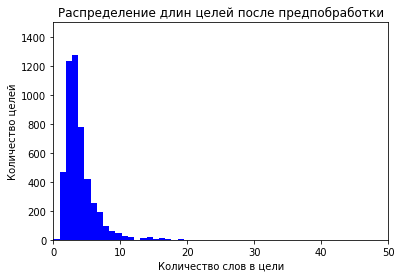

In [27]:
lenghts = data['lemmatized'].apply(lambda s: len(s))
fig, ax = plt.subplots()
plt.hist(lenghts, bins=150, color = 'blue', label='empirical histogram')
ax.set_xlim(left=0, right=50)
ax.set_ylim(bottom=0, top=1500)
ax.set_title('Распределение длин целей после предпобработки')
ax.set_xlabel('Количество слов в цели')
ax.set_ylabel('Количество целей')
plt.show()

fig.savefig('./images/Распределение длин целей ПОСЛЕ.pdf')

In [28]:
length_distribution['после предобработки'] = pd.DataFrame(lenghts.describe())['lemmatized']
length_distribution.rename(columns={'lemmatized':'после предобработки'}, inplace=True)

In [29]:
length_distribution

,до предобработки,после предобработки
count,5153.000000,4955.000000
mean,4.692800,3.753582
std,5.675536,3.307670
min,1.000000,0.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,6.000000,4.000000
max,220.000000,139.000000


In [30]:
file = open('./tables/Распределение длин.txt', 'w')
file.write(length_distribution.to_latex())
file.close()

In [31]:
dataset['id'] = data['id']
dataset['goal'] = data['goal']
dataset['vw_text'] = vw_text_unigram
dataset['vw_ngram'] = vw_text_ngram
dataset['vw_ngram_info'] = vw_text_ngram_info
dataset['vw_ngram_info_labels'] = vw_text_ngram_info_labels

In [32]:
dataset.head()

,info,specificity,attainable,time_bound,id,goal,vw_text,vw_ngram,vw_ngram_info,vw_ngram_info_labels
0,"&РЕЗУЛЬТАТ_Да,_четко &ПЕРВЫЙ_ШАГ_Не_знаю,_с_че...",0,1,0,0,Развитие профессиональных навыков,0 |@unigram развитие:1 профессиональный:1 навы...,0 |@ngram развитие:1 профессиональный:1 навык:...,0 |@ngram развитие:1 профессиональный:1 навык:...,0 |@ngram развитие:1 профессиональный:1 навык:...
1,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",1,1,1,1,Хочу стать выпускником президентской программы,1 |@unigram хотеть:1 стать:1 выпускник:1 прези...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...
2,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,1,0,2,приобретение новых знаний,2 |@unigram приобретение:1 новый:1 знание:1,2 |@ngram приобретение:1 новый:1 знание:1 прио...,2 |@ngram приобретение:1 новый:1 знание:1 прио...,2 |@ngram приобретение:1 новый:1 знание:1 прио...
3,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,0,0,4,мне хочется узнать о мире как можно больше за ...,4 |@unigram хотеться:1 узнать:1 мир:1 большой:...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...
4,"&РЕЗУЛЬТАТ_Да,_четко &ТИП_ЦЕЛИ_Получить_знания...",0,1,0,5,Получение новых знаний,5 |@unigram получение:1 новый:1 знание:1,5 |@ngram получение:1 новый:1 знание:1 получен...,5 |@ngram получение:1 новый:1 знание:1 получен...,5 |@ngram получение:1 новый:1 знание:1 получен...


In [33]:
data.head()

,goal,id,result_tokens,goal_type_tokens,first_step_tokens,time_tokens,goal_field_tokens,obstacle_tokens,sex_tokens,education_tokens,...,tokenized,lemmatized,bigram,sp_tokens,at_tokens,tb_tokens,vw_text,vw_text_ngram,vw_text_ngram_info,vw_text_ngram_info_labels
0,Развитие профессиональных навыков,0,"&РЕЗУЛЬТАТ_Да,_четко",НЕТ ИНФОРМАЦИИ,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,...,"[(развитие, JJ), (профессиональных, NNP), (нав...","[развитие, профессиональный, навык]","[развитие_профессиональный, профессиональный_н...",@specificity 0:3,@atteinable 1:2 0:1,@time_bound 0:2 1:1,0 |@unigram развитие:1 профессиональный:1 навы...,0 |@ngram развитие:1 профессиональный:1 навык:...,0 |@ngram развитие:1 профессиональный:1 навык:...,0 |@ngram развитие:1 профессиональный:1 навык:...
1,Хочу стать выпускником президентской программы,1,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_есть_границы,"&ОБЛАСТЬ_ЦЕЛИ_Иностранные_языки,_гуманитарные_...",&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,"[(хочу, JJ), (стать, NNP), (выпускником, NNP),...","[хотеть, стать, выпускник, президентский, прог...","[хотеть_стать, президентский_программа]",@specificity 1:3,@atteinable 1:3,@time_bound 1:2 0:1,1 |@unigram хотеть:1 стать:1 выпускник:1 прези...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...,1 |@ngram хотеть:1 стать:1 выпускник:1 президе...
2,приобретение новых знаний,2,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков,&ОБЛАСТЬ_ЦЕЛИ_другое,&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,"[(приобретение, JJ), (новых, NNP), (знаний, NN)]","[приобретение, новый, знание]","[приобретение_новый, новый_знание]",@specificity 0:3,@atteinable 1:2 0:1,@time_bound 0:2 1:1,2 |@unigram приобретение:1 новый:1 знание:1,2 |@ngram приобретение:1 новый:1 знание:1 прио...,2 |@ngram приобретение:1 новый:1 знание:1 прио...,2 |@ngram приобретение:1 новый:1 знание:1 прио...
3,мне хочется узнать о мире как можно больше за ...,4,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,&ПЕРВЫЙ_ШАГ_знаю_с_чего_начать,&ВРЕМЕННЫЕ_ГРАНИЦЫ_Нет_жестких_сроков,&ОБЛАСТЬ_ЦЕЛИ_другое,&ПРЕГРАДЫ_Не_вижу_преград,НЕТ ИНФОРМАЦИИ,НЕТ ИНФОРМАЦИИ,...,"[(мне, JJ), (хочется, NNP), (узнать, NNP), (о,...","[хотеться, узнать, мир, большой, короткий, вре...",[мир_большой],@specificity 0:3,@atteinable 0:2 1:1,@time_bound 0:2 1:1,4 |@unigram хотеться:1 узнать:1 мир:1 большой:...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...,4 |@ngram хотеться:1 узнать:1 мир:1 большой:1 ...
4,Получение новых знаний,5,"&РЕЗУЛЬТАТ_Да,_четко",&ТИП_ЦЕЛИ_Получить_знания_в_новой_области &ТИП...,"&ПЕРВЫЙ_ШАГ_Не_знаю,_с_чего_начать",&ВРЕМЕННЫЕ_ГРАНИЦЫ_Не_знаю,"&ОБЛАСТЬ_ЦЕЛИ_Универсальные_компетенции,_гибки...",&ПРЕГРАДЫ_Не_вижу_преград,&ПОЛ_Женщина,&ОБРАЗОВАНИЕ_Высшее_образование,...,"[(получение, JJ), (новых, NNP), (знаний, NN)]","[получение, новый, знание]","[получение_новый, новый_знание]",@specificity 0:2 1:1,@atteinable 0:1 1:2,@time_bound 0:3,5 |@unigram получение:1 новый:1 знание:1,5 |@ngram получение:1 новый:1 знание:1 получен...,5 |@ngram получение:1 новый:1 знание:1 получен...,5 |@ngram получение:1 новый:1 знание:1 получен...


In [34]:
data.values[570]

array(['быть первым', 770, '&РЕЗУЛЬТАТ_Да,_четко', 'НЕТ ИНФОРМАЦИИ',
       'НЕТ ИНФОРМАЦИИ', 'НЕТ ИНФОРМАЦИИ', 'НЕТ ИНФОРМАЦИИ',
       'НЕТ ИНФОРМАЦИИ', 'НЕТ ИНФОРМАЦИИ', 'НЕТ ИНФОРМАЦИИ',
       'НЕТ ИНФОРМАЦИИ', 'НЕТ ИНФОРМАЦИИ', 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, list([('быть', 'NN'), ('первым', 'NN')]), list([]),
       list([]), '@specificity 0:2 1:1 ', '@atteinable 0:2 1:1 ',
       '@time_bound 0:3 ', '770 |@unigram ', '770 |@ngram ',
       '770 |@ngram  |@info &РЕЗУЛЬТАТ_Да,_четко:1 ',
       '770 |@ngram  |@info &РЕЗУЛЬТАТ_Да,_четко:1  |@specificity 0'],
      dtype=object)

In [35]:
data.shape

(4955, 31)

In [36]:
dataset.shape

(4955, 10)

In [37]:
data['lemmatized_as_str'] = [' '.join(l) for l in data['lemmatized']]
data['bigram_as_str'] = [' '.join(l) for l in data['bigram']]
data['info_as_str'] = dataset['info']

Тут надо добавить info_as_str в файл, а потом делать CountVectorizer по целям вместе с info.

In [38]:
data[['goal', 'id', 'lemmatized_as_str', 'bigram_as_str', 'info_as_str']].to_csv('data_for_specifisity_calculations.csv',
                                                                  index=False)

In [39]:
vocabulary = []
for index, goal in data.iterrows():
    for token in goal['lemmatized']:
        if token not in vocabulary:
            vocabulary.append(token)
vocabulary = sorted(vocabulary)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [' '.join(goal['lemmatized']) for index, goal in data.iterrows()]
vectorizer = CountVectorizer(vocabulary=vocabulary)
X = vectorizer.fit_transform(corpus)

In [41]:
matrix_of_frequancies = pd.DataFrame(X.toarray())

In [42]:
matrix_of_frequancies.index=dataset['id']
matrix_of_frequancies.columns=vectorizer.get_feature_names()

In [43]:
dataset.to_csv('preprocessed_data_for_specificity_prediction.csv', index=False)

In [44]:
import copy

dataset_for_TopicNet = copy.deepcopy(dataset[['id', 'goal', 'vw_ngram_info_labels']])
dataset_for_TopicNet.rename(columns={'goal':'raw_text', 'vw_ngram_info_labels':'vw_text'}, inplace=True)
dataset_for_TopicNet.to_csv('preprocessed_data_for_TopicNet.csv', index=False)

In [45]:
dataset.to_csv('preprocessed_data_for_specificity_prediction.csv', index=False)

In [46]:
pd.options.display.max_colwidth = 200

Количество целей, размеченных как {0, 0, 0}

In [47]:
len(dataset.loc[(dataset['specificity'] == 0) & (dataset['attainable'] == 0) & (dataset['time_bound'] == 0)])

1192

Количество целей, размеченных как {1, 1, 1}

In [48]:
len(dataset.loc[(dataset['specificity'] == 1) & (dataset['attainable'] == 1) & (dataset['time_bound'] == 1)])

795

In [49]:
len(dataset.loc[dataset['specificity'] == 0])

2740

Всего целей:

In [50]:
len(data['goal'])

4955

Из них уникальных:

In [51]:
data['goal'].nunique()

3957

А после предобработки уникальных остается:

In [52]:
texts = [' '.join(data['lemmatized'].values[i]) for i in range(len(data))]

In [53]:
pd.DataFrame({'unique_goals':texts})['unique_goals'].nunique()

3521